In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])

In [5]:
X = df.iloc[:100,[0,2]].values # choose first 100 rows???
y = df.iloc[0:100,4].values
y = np.where(y == 0, -1, 1) # change target

In [6]:
import matplotlib.pyplot as plt

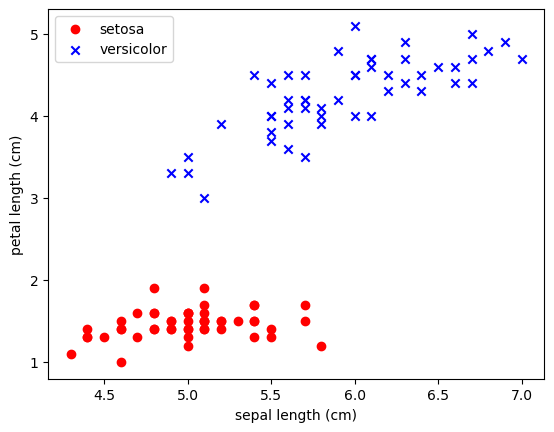

In [7]:
plt.scatter(X[:50,0],X[:50,1],color='red', marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue', marker='x',label='versicolor')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.show()

In [8]:
# implementacja 
import random

class Perceptron():
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        #self.w_ = np.zeros(1+X.shape[1])
        
        self.w_ = [random.uniform(-1.0, 1.0) for _ in range(1+X.shape[1])] 
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                #print(xi, target)
                update = self.eta*(target-self.predict(xi))
                #print(update)
                self.w_[1:] += update*xi
                self.w_[0] += update
                #print(self.w_)
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X)>=0.0,1,-1)

In [9]:
# uzycie jak wszsytkie klasy sklearn
ppn = Perceptron()
ppn.fit(X,y)

In [10]:
print(ppn.errors_)
print(ppn.w_)

[8, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-1.132315297769159, -0.09215816690580081, 0.7489319165012243]


In [11]:
ppn.predict(X)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [12]:
ppn.predict([[5.1,3.1]]) ## 把这两个特征输到list中，会有一个预测值

array([1])

In [13]:
# dodatkowa funkcja

from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier, resolution=0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0], y=X[y==cl,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

# dla kwiatków

/tmp/ipykernel_406/2939353802.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl,0], y=X[y==cl,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)


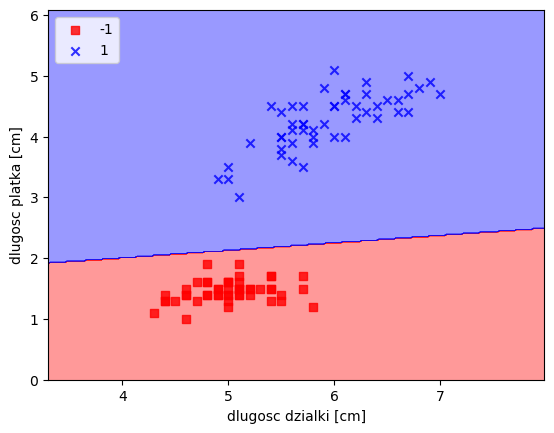

In [14]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel("dlugosc dzialki [cm]")
plt.ylabel("dlugosc platka [cm]")
plt.legend(loc='upper left')
plt.show()

# SERVER FLASK 

In [46]:
import pickle

In [47]:
ppn.w_   ##要把自己的模型应用到这个notebook中

[-1.132315297769159, -0.09215816690580081, 0.7489319165012243]

In [48]:
### Zapisz swój najlepszy model 
import pickle
with open('model.pkl', "wb") as picklefile:
    pickle.dump(ppn, picklefile)

In [49]:
with open('model.pkl',"rb") as picklefile:
    model = pickle.load(picklefile)

In [50]:
model.w_

[-1.132315297769159, -0.09215816690580081, 0.7489319165012243]

In [51]:
model.predict([[5.1,3.1]])

array([1])

In [52]:
import subprocess
import requests

In [53]:
## !pip install flask ## for web server,是一个API，可以从fastAPI的网站查看怎么做

In [54]:
## 使用 Flask 框架创建的简单 Web 应用程序。代码的作用是创建一个名为 "app" 的 Flask 应用程序实例，
## 并在其上定义了一个 API 端点 "/hello"，使用 GET 请求方法来响应客户端请求。
## 当客户端访问该端点时，服务器将返回 "Hello" 的字符串。
## 最后，当 Python 文件作为主程序运行时，应用程序将在本地主机上的默认端口上启动，以便客户端可以访问 API 端点。
%%file app1.py

from flask import Flask

# Create a flask
app = Flask(__name__)

# Create an API end point
@app.route('/hello', methods=['GET'])
def say_hello():
    return "<b>Hello</b>"

if __name__ == '__main__':
    app.run()

UsageError: Line magic function `%%file` not found.


In [55]:
p = subprocess.Popen(["python", "app1.py"])

In [56]:
response = requests.get("http://127.0.0.1:5000/hello")
response.content

b'<b>Hello</b>'

In [57]:
p.kill() ## stop the server

In [58]:
response = requests.get("http://127.0.0.1:5000/hello")
response.content

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /hello (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f12fa9aa140>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [28]:
!pip install uvicorn fastapi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 2.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 7.1 MB/s eta 0:00:00


In [68]:
## change docker file to my computer
%%file app.py ##改变1

from flask import Flask

app = Flask(__name__)

@app.route('/') ## 改变2
def hello():
    return "<h1>hello world</h1>"

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5050) ##改变3

UsageError: Line magic function `%%file` not found.


In [73]:
%%file Dockerfile
FROM python:3.10

WORKDIR /app

COPY app.py .
COPY requirements.txt .
COPY model.pkl .


RUN pip install -r requirements.txt

EXPOSE 5050

ENTRYPOINT ["python"]

CMD ["app.py"]

Overwriting Dockerfile


In [72]:
%%file requirements.txt
Flask==2.1.0
numpy

Overwriting requirements.txt


```bash
docker build -t test_hello .

docker run -p 5000:5000 test_hello
```

In [62]:
%%file app2.py

from flask import Flask
from flask import request

# Create a flask
app = Flask(__name__)

# Create an API end point
@app.route('/hello', methods=['GET'])
def say_hello():
    name = request.args.get("name", "")
    title = request.args.get("title", "")
    if name:
        resp = f"Hello {title} {name}" if title else f"Hello {name}"
    else:
        resp = f"Hello {title}" if title else "Hello"
    return resp

if __name__ == '__main__':
    app.run()

Overwriting app2.py


In [63]:
p = subprocess.Popen(["python", "app2.py"])

In [64]:
response = requests.get("http://127.0.0.1:5000/hello")
response.content

b'Hello'

In [65]:
response = requests.get("http://127.0.0.1:5000/hello?name=Sebastian&title=mr")
response.content

b'Hello mr Sebastian'

In [66]:
response = requests.get("http://127.0.0.1:5000/hello", params={"name": "Patryk", "title": "mr"})
response.content

b'Hello mr Patryk'

In [67]:
p.kill()

In [71]:
%%file app.py

import pickle
from math import log10

from flask import Flask
from flask import request
from flask import jsonify
import numpy as np

import random

class Perceptron():
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        # self.w_ = np.zeros(1+X.shape[1])
        
        self.w_ = [random.uniform(-1.0, 1.0) for _ in range(1+X.shape[1])] 
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                #print(xi, target)
                update = self.eta*(target-self.predict(xi))
                #print(update)
                self.w_[1:] += update*xi
                self.w_[0] += update
                #print(self.w_)
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X)>=0.0,1,-1)

# Create a flask
app = Flask(__name__)

# Create an API end point
@app.route('/api/v1.0/predict', methods=['GET'])
def get_prediction():

    # sepal length
    sepal_length = float(request.args.get('sl'))
    # sepal width
    #sepal_width = float(request.args.get('sw'))
    # petal length
    petal_length = float(request.args.get('pl'))
    # petal width
    #petal_width = float(request.args.get('pw'))

    # The features of the observation to predict
    #features = [sepal_length,
    #            sepal_width,
    #            petal_length,
    #           petal_width]
    
    features = [sepal_length,
                petal_length]
    
    print(features)
    # Load pickled model file
    with open('model.pkl',"rb") as picklefile:
        model = pickle.load(picklefile)
    print(model)
    # Predict the class using the model
    predicted_class = int(model.predict(features))
    
    # Return a json object containing the features and prediction
    return jsonify(features=features, predicted_class=predicted_class)

if __name__ == '__main__':
     app.run(host='0.0.0.0', port=5050)

Overwriting app.py


In [43]:
!head app.py


import pickle
from math import log10

from flask import Flask
from flask import request
from flask import jsonify
import numpy as np

import random


In [ ]:
!python app.py

In [45]:
# http://127.0.0.1:5000/api/v1.0/predict?&sl=4.5&pl=1.3

# pamiętaj otworzyć nowy notebook !
import requests
response = requests.get("http://127.0.0.1:5050/api/v1.0/predict?&sl=4.5&pl=1.3")
print(response.content)

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /api/v1.0/predict?&sl=4.5&pl=1.3 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f12faab19f0>: Failed to establish a new connection: [Errno 111] Connection refused'))